In [1]:
#import packages
import numpy as np 
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
from matplotlib import pyplot as plt
%matplotlib inline

import os 
import calendar 
from pathlib import Path 
import networkx as nx
import seaborn as sns
from sklearn import preprocessing


#import data
laptop_df = pd.read_csv('LaptopSalesJanuary2008.csv')

In [2]:
#check data imported correctly
laptop_df.head()

,Date,Configuration,Customer Postcode,Store Postcode,Retail Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),Integrated Wireless?,HD Size (GB),Bundled Applications?,OS X Customer,OS Y Customer,OS X Store,OS Y Store,CustomerStoreDistance
0,1/1/2008 0:01,163,EC4V 5BH,SE1 2BN,455,15,5,1,2.0,Yes,80,Yes,532041,180995,534057.0,179682.0,2405.873022
1,1/1/2008 0:02,320,SW4 0JL,SW12 9HD,545,15,6,1,2.0,No,300,No,529240,175537,528739.0,173080.0,2507.558574
2,1/1/2008 0:04,23,EC3V 1LR,E2 0RY,515,15,4,1,2.0,Yes,300,Yes,533095,181047,535652.0,182961.0,3194.001409
3,1/1/2008 0:04,169,SW1P 3AU,SE1 2BN,395,15,5,1,2.0,No,40,Yes,529902,179641,534057.0,179682.0,4155.202281
4,1/1/2008 0:06,365,EC4V 4EG,SW1V 4QQ,585,15,6,2,2.0,No,120,Yes,531684,180948,528924.0,178440.0,3729.298057


In [3]:
average_price_by_store = laptop_df.groupby('Store Postcode')['Retail Price'].mean()

In [4]:
average_price_by_store

Store Postcode
CR7 8LE     488.619048
E2 0RY      483.171729
E7 8NW      494.381443
KT2 5AU     493.904762
N17 6QA     494.634146
N3 1DH      487.368421
NW5 2QH     486.580460
S1P 3AU     486.250000
SE1 2BN     486.680195
SE8 3JD     492.177778
SW12 9HD    485.295699
SW18 1NN    493.038922
SW1P 3AU    488.506858
SW1V 4QQ    489.344978
W10 6HQ     489.866667
W4 3PH      481.006289
Name: Retail Price, dtype: float64

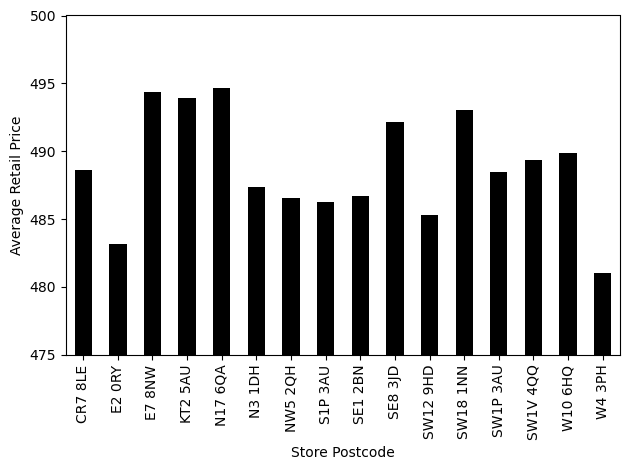

(475.0, 500.0)

In [17]:
average_price_by_store.plot(kind = 'bar', color = 'Black')
plt.xlabel('Store Postcode')
plt.ylabel('Average Retail Price')
plt.tight_layout()
plt.show()
plt.ylim(475,500) 

In [7]:
highest_average_store = average_price_by_store.idxmax()
lowest_average_store = average_price_by_store.idxmin()
highest_average_store_price = average_price_by_store.max()
lowest_average_store_price = average_price_by_store.min()

print(f"The Store with the highest average retail price is {highest_average_store}, with an average price of {highest_average_store_price: .2f}. ")
print(f"The Store with the lowest average retail price is {lowest_average_store}, with an average price of {lowest_average_store_price: .2f}. ")

The Store with the highest average retail price is N17 6QA, with an average price of  494.63. 
The Store with the lowest average retail price is W4 3PH, with an average price of  481.01. 


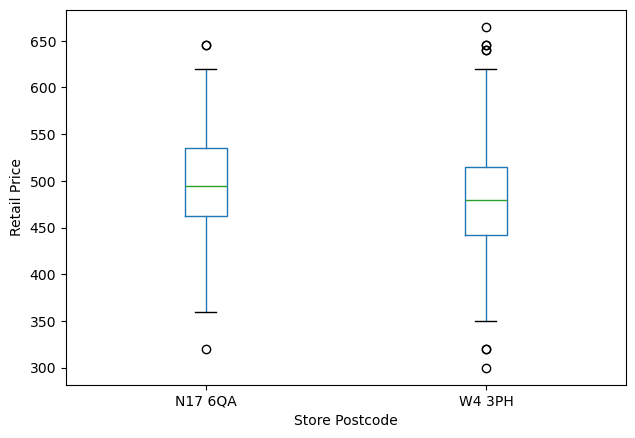

In [30]:
#create side-by-side boxplots
filtered_postcodes = ['N17 6QA', 'W4 3PH']
filtered_data = laptop_df[laptop_df['Store Postcode'].isin (filtered_postcodes)]

filtered_data.boxplot(column = 'Retail Price', by = 'Store Postcode', figsize = (7,5), grid = False)

plt.xlabel('Store Postcode')
plt.ylabel('Retail Price')
plt.suptitle('')
plt.title('')
plt.show()

In [ ]:
#compare medians, ranges, and detect any outliers that may explain differences.
#The ranges min and max are pretty similar, W4 3PH has a lower median but still pretty comparable to N17 6QA, W4 3PH also has more outliers than N17 6QA on both ends of the retail price which may explain the lower average price in comparison. The median price for N17 6QA is higher than W4 3PH but still pretty comparable. 